# Decisión Tree

Primeramenta necesitamos instalar los siguientes paquetes, los cuales son necesarios para el algoritmo de Arboles de decisiones.

In [1]:
#pip install graphviz
#pip install pydotplus
#pip install decision-tree-id3

### Graphviz
Este paquete facilita y permite la creación y represantación de grafos.

### Pydotplus
Este paquete proporciona una interaz que dibuja el grafo.

### Decision-tree-id3
Este paquete proporciona el algoritmo de aprendizaje automático id3, el cual permite construir arboles de clasificación. Este algoritmo fue desarrollado por Ross Quinlan en 1986.
<hr>

Luego de haber instalado los paquetes anteriores se procede a importar las librerias necesarias para el algoritmo. 

<ul>
    <li><strong> Pandas: </strong> esta librería facilita la manipulación y el analisis de datos.</li>
    <li><strong> Matplotlib.pyplot:</strong> esta librería proporciona la generación de gráficos a partir de datos contenidos en listas o arrays.</li>
    <li><strong> Seaborn:</strong> esta librería esta basada en Matploblib, proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.</li>
    <li><strong> Tree from sklearn:</strong> esta librería permite crear el arbol de decisión.</li>
    <li><strong> Pydotplus:</strong> esta librería proporciona una interfaz que dibuja el grafo de arbol de decisión.</li>
    <li><strong> Image:</strong> esta librería facilita la visualización del grafo como una imagen.</li>
</ul>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree #For our Decision Tree
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph

Teniendo todas las librerias importadas,en este caso <strong>Pandas</strong> se procede a realizar la lectura del archvio que contiene el conjunto de datos a manipular. Para ello se utiliza la función <em>pandas.read_csv(filepath_or_buffer)</em>, la cual recibe como parametro la ruta del archivo css y lo almacena en un dataframe.

In [10]:
golf = pd.read_csv('golf_dataset_Binary.csv')

El dataframe ha sido almacenado en la variable <em>golf</em>, y para imprimir el resultado de las n primeras filas, se hace uso de la función <em>golf.head(n)</em> (cabe aclarar que n debe ser un entero mayor que 0). Para este caso n tendrá un valor de 5 y se puede observar a continuación. <br> Por otra parte, si se quieren obtener los valores unicos en una columna especifica, se utiliza la siguiente función: <em>golf.nombre_columna.unique()</em>.

In [11]:
golf.head(5)
#golf.Outlook.unique()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,False,no
1,Sunny,Hot,High,True,no
2,Rain,Hot,High,False,no
3,Rain,Cool,Normal,False,yes
4,Rain,Cool,Normal,True,no


El siguiente paso es transformar el conjunto de datos en una matriz de representación númerica. Para lograr esto se hace uso del método <em>pandas.factorize()</em>, esta función identifica los valores distintos de cada columna del dataset y le asigna un valor númerico mayor o igual a 0, si no encuentra valores, este le asigna -1. En este caso se aplica a las columnas(Outlook, Temperature, Humidity, Windy).

In [12]:
#factorize makes a categorical attribute to a numerical represetation
golf['Outlook'],_ = pd.factorize(golf['Outlook'])
golf['Temperature'],_ = pd.factorize(golf['Temperature'])
golf['Humidity'],_ = pd.factorize(golf['Humidity'])
golf['Windy'],_ = pd.factorize(golf['Windy'])
#golf['Play'],_ = pd.factorize(golf['Play'])

A continuación se puede observar la matriz de representación númerica.

In [13]:
print(golf)

   Outlook  Temperature  Humidity  Windy Play
0        0            0         0      0   no
1        0            0         0      1   no
2        1            0         0      0   no
3        1            1         1      0  yes
4        1            1         1      1   no
5        0            0         0      0   no
6        0            1         1      0  yes
7        1            0         1      0  yes
8        0            1         1      1  yes
9        1            0         1      1   no


Teniendo la matriz con los valores representados en números, se utiliza el método <em>pandas.DataFrame.loc</em> el cual permite acceder a un grupo de filas y columnas por medio de una matriz booleana.

In [14]:
#one hot the data
one_hot_data = golf.loc[:,('Outlook','Temperature','Humidity','Windy')]

Ahora se necesita entrenar el arbol de decisión. Pero primero se debe usar un clasificador, para esto se utiliza el método <em>sklearn.tree.DecisionTreeClassifier(criterion)</em>, el cual puede entrenarse por dos criterios(gini, entropía), en este caso se aplica el criterio entropía debido a que lo que se busca es obtener ganancia de información.
<br><br>
Una vez se tenga el clasificador, se procede a entrenar el arbol de decisión utilizando el metodo <em>.fit</em> el cual recibe como parámetro el grupo de filas <em>one_hot_data</em> y la columna respuesta.

In [15]:
# train the decision tree
#dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf_train = clf.fit(one_hot_data, golf['Play'])
#conda install python-graphviz

Luego de tener el arbol de decisión entrenado, se procede a exportarlo como una imagen. Para esto se necesitan los nombres de las columnas los cuales son obtenidos con la función <em>golf.columns</em>; una vez se tengan los nombres de las columnas se procede a crear el grafo utilizando el método <em>tree.export_graphviz()</em> el cual recibe como parámetros el arbol de decisión entrenado, las columnas y los nombres de las clases.

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Humidity <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]\nclass = Not_Play", fillcolor="#e5813955"] ;
1 [label="entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Not_Play", fillcolor="#e58139ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Windy <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = Play", fillcolor="#399de57f"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Play", fillcolor="#399de5ff"] ;
2 -> 3 ;
4 [label="Outlook <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = Not_Play", fillcolor="#e581397f"] ;
2 -> 4 ;
5 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Play", fillcolor="#399de5ff"] ;
4 -> 5 ;
6 [label="entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Not_Play", fillcolor="#e58139ff"]

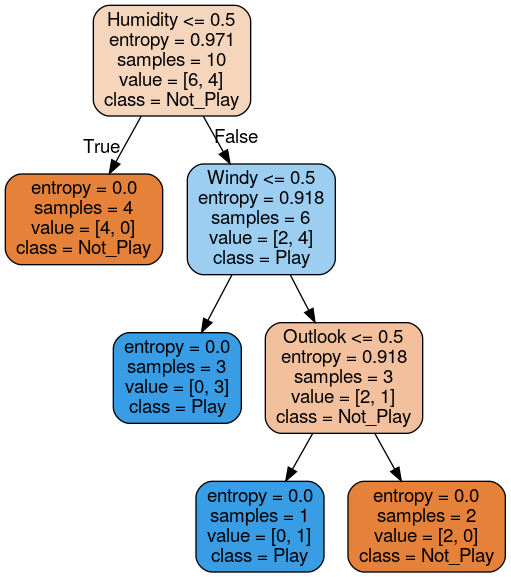

In [17]:
feature_names = golf.columns

dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values),
                                class_names=['Not_Play', 'Play'], rounded = True, filled = True)
print(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())